In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_excel("C:/Users/swati/Downloads/CHURNDATA (1).xlsx")

In [6]:
data.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [7]:
data.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

Box and Distribution plot of CUS_Monthly_Income

<Axes: >

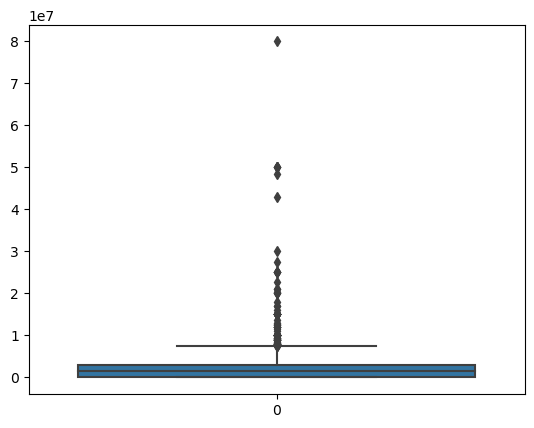

In [8]:
sns.boxplot(data.CUS_Month_Income)

<Axes: xlabel='CUS_Month_Income', ylabel='Density'>

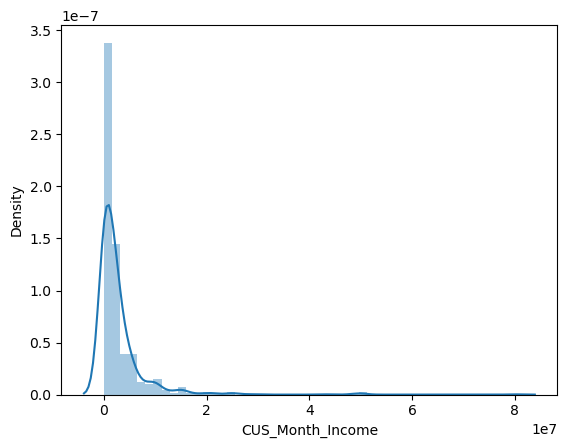

In [9]:
sns.distplot(data.CUS_Month_Income)

In [10]:
# dropping the outliers
data=data[data.CUS_Month_Income!=data.CUS_Month_Income.max()]

In [11]:
data['CUS_Month_Income'] = data['CUS_Month_Income'].fillna(data['CUS_Month_Income'].mode()[0])

In [12]:
data["CUS_Gender"].value_counts()

CUS_Gender
MALE      741
FEMALE    505
Name: count, dtype: int64

In [13]:
data["CUS_Gender"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

Converting categorical feature to numerical feature

In [14]:
data["CUS_Gender"] = data["CUS_Gender"].map({'MALE':1,"FEMALE":0})

In [15]:
data["CUS_Gender"]

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       1.0
6       0.0
7       1.0
8       1.0
9       0.0
10      1.0
11      1.0
12      1.0
13      0.0
14      1.0
15      1.0
16      1.0
17      1.0
18      0.0
19      1.0
20      1.0
21      1.0
22      0.0
23      1.0
24      0.0
25      0.0
26      0.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
32      1.0
33      1.0
34      0.0
35      0.0
36      0.0
37      1.0
38      0.0
39      1.0
40      1.0
41      1.0
42      1.0
43      0.0
44      1.0
45      0.0
46      1.0
47      1.0
48      1.0
49      1.0
50      1.0
51      0.0
52      1.0
53      1.0
54      0.0
55      0.0
56      1.0
57      0.0
58      1.0
59      1.0
60      1.0
61      1.0
62      1.0
63      0.0
64      0.0
65      0.0
66      1.0
67      0.0
68      1.0
69      1.0
70      0.0
71      1.0
72      0.0
73      0.0
74      1.0
75      0.0
76      1.0
77      1.0
78      0.0
79      1.0
80      1.0
81      1.0
82      0.0
83  

Coverting  DOB to datetime format and set the customer year

In [16]:
data["CUS_DOB_Year"] = pd.to_datetime(data["CUS_DOB"]).dt.year

Handling the nan value

In [17]:
data["CUS_Gender"].fillna(data.CUS_Gender.mean(), inplace=True)

In [18]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [19]:
data["CUS_Gender"]

0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       1.000000
6       0.000000
7       1.000000
8       1.000000
9       0.000000
10      1.000000
11      1.000000
12      1.000000
13      0.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      0.000000
19      1.000000
20      1.000000
21      1.000000
22      0.000000
23      1.000000
24      0.000000
25      0.000000
26      0.000000
27      1.000000
28      1.000000
29      1.000000
30      1.000000
31      1.000000
32      1.000000
33      1.000000
34      0.000000
35      0.000000
36      0.000000
37      1.000000
38      0.000000
39      1.000000
40      1.000000
41      1.000000
42      1.000000
43      0.000000
44      1.000000
45      0.000000
46      1.000000
47      1.000000
48      1.000000
49      1.000000
50      1.000000
51      0.000000
52      1.000000
53      1.000000
54      0.000000
55      0.000000
56      1.000000
57      0.000000
58      1.0000

Converting TAR_Desc (categorical feature) to (numerical feature)

In [20]:
data.TAR_Desc.value_counts()

TAR_Desc
LOW          753
MIDLE        406
EXECUTIVE     59
PLATINUM      30
Name: count, dtype: int64

In [21]:
data["TAR_Desc"] = data["TAR_Desc"].map({'PLATINUM':4,'EXECUTIVE':3,'MIDLE':2,'LOW':1})

In [22]:
data['TAR_Desc']

0       3
1       1
2       2
3       1
4       1
5       2
6       1
7       1
8       3
9       1
10      1
11      1
12      2
13      1
14      1
15      2
16      2
17      2
18      2
19      1
20      3
21      2
22      1
23      2
24      1
25      1
26      2
27      1
28      2
29      1
30      2
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      2
41      1
42      1
43      2
44      2
45      1
46      3
47      2
48      1
49      2
50      2
51      2
52      1
53      2
54      2
55      2
56      1
57      2
58      1
59      1
60      2
61      1
62      2
63      2
64      1
65      1
66      1
67      4
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      3
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      2
85      1
86      2
87      2
88      1
89      1
90      1
91      1
92      1
93      2
94      3
95      2
96      1
97      1
98      1
99      1


Converting Status (categorical feature) to (numerical feature)


In [23]:
data["Status"] = data["Status"].map({'ACTIVE':1,'CHURN':0})

In [24]:
data["Status"]

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      0
30      1
31      0
32      1
33      1
34      1
35      0
36      1
37      1
38      1
39      1
40      1
41      0
42      1
43      1
44      1
45      0
46      1
47      0
48      1
49      1
50      1
51      0
52      1
53      1
54      1
55      0
56      0
57      1
58      1
59      0
60      1
61      1
62      1
63      1
64      0
65      0
66      0
67      1
68      0
69      1
70      1
71      1
72      0
73      0
74      0
75      1
76      1
77      1
78      1
79      1
80      1
81      0
82      1
83      1
84      1
85      1
86      1
87      1
88      0
89      1
90      1
91      1
92      1
93      0
94      1
95      1
96      1
97      1
98      0
99      1


Graph between Martial status and status**
1. Single are more tend to churn.
2. We can ignore other as it's not impacting the target feature.


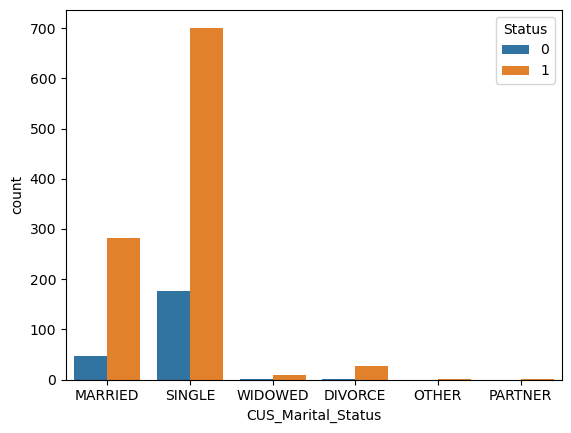

In [25]:
sns.countplot(data=data, x='CUS_Marital_Status', hue='Status')
plt.show()

In [26]:
data['CUS_Marital_Status'].value_counts()

CUS_Marital_Status
SINGLE     878
MARRIED    328
DIVORCE     30
WIDOWED     10
OTHER        1
PARTNER      1
Name: count, dtype: int64

In [27]:
X = pd.get_dummies(data['CUS_Marital_Status'], drop_first=True)

X.sample()

data = pd.concat([X,data], axis=1)

data.sample()

,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,CUS_DOB_Year
1174,False,False,False,True,False,XXXXXX,Sep 6 1997 12:00AM,22,2000000.0,1.0,SINGLE,2006-01-19,13,8,27,31,34991.67,235976.26,339028.08,0,0,0,0.0,0.0,0.0,609996.01,66,0.0,0,66,2223,1,0,1997


In [28]:
data.columns

Index(['MARRIED', 'OTHER', 'PARTNER', 'SINGLE', 'WIDOWED', 'CIF', 'CUS_DOB',
       'AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CUS_DOB_Year'],
      dtype='object')

Age between 37 to 60 are more likely to churned

<Figure size 2400x1600 with 0 Axes>

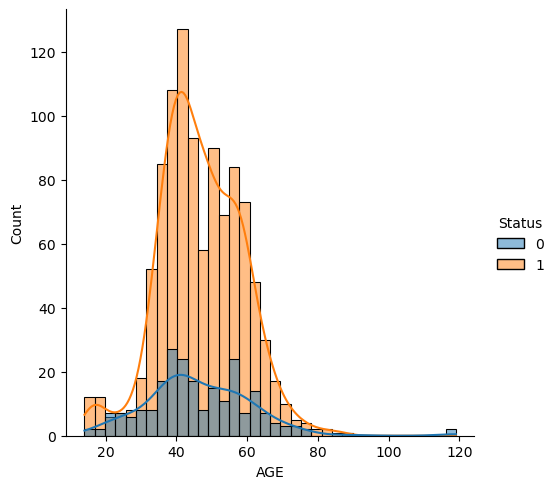

In [29]:
plt.figure(figsize=(24,16))
sns.displot(data=data, x="AGE", hue="Status",  kde=True, )
plt.show()

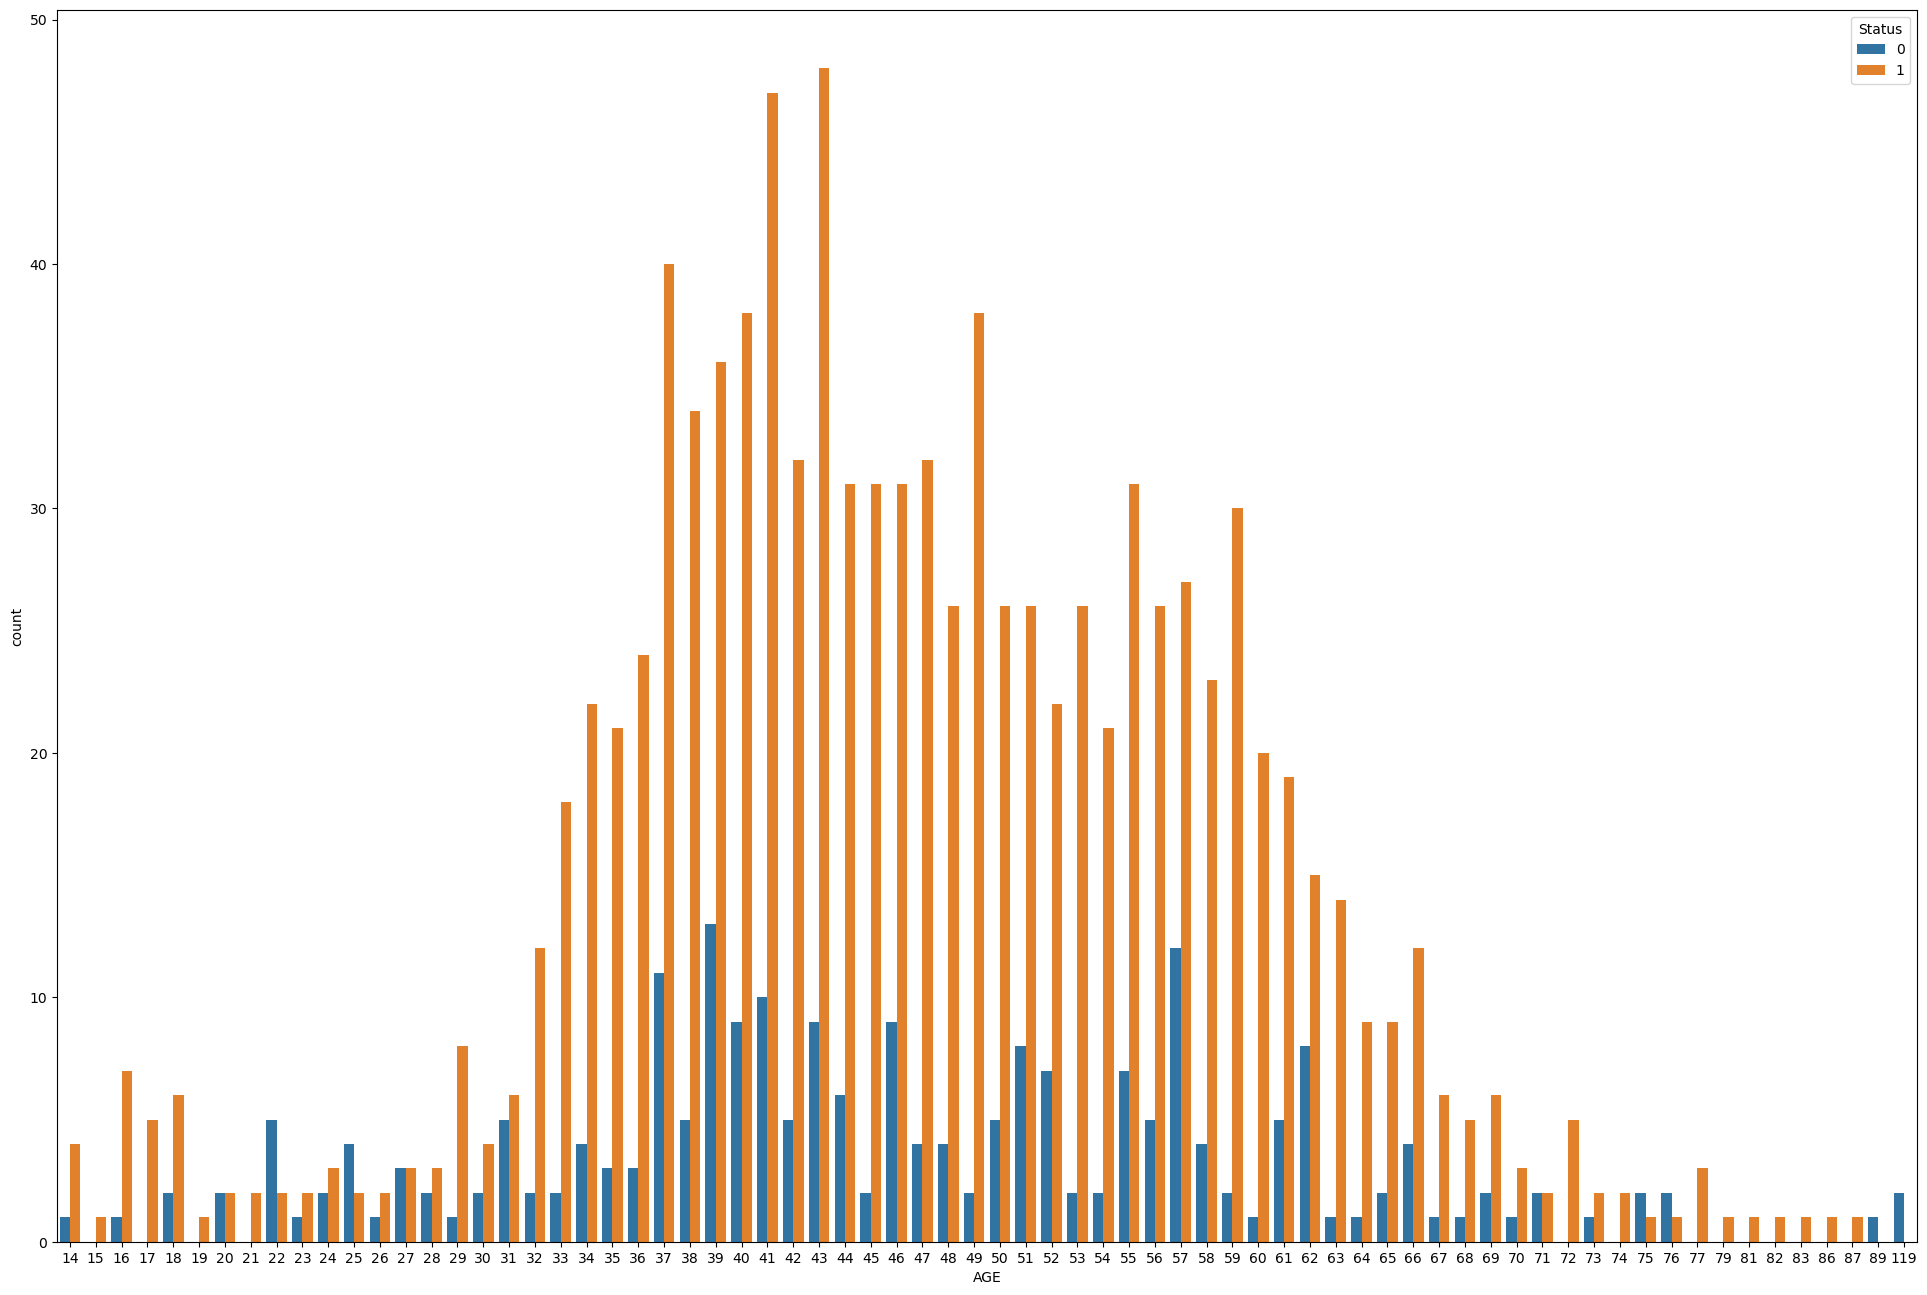

In [30]:
plt.figure(figsize=(24,16))
sns.countplot(data=data, x="AGE", hue="Status", )
plt.show()

Dropping irrelevant features

In [31]:
data.drop(["CIF", "CUS_DOB","CUS_Marital_Status", "CUS_Customer_Since", "# total debit transactions for S1", "# total debit transactions for S2", "# total debit transactions for S3","total debit amount for S1", "total debit amount for S2","total debit amount for S3", "# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3", "total credit amount for S1","total credit amount for S2","total credit amount for S3","OTHER" ], axis=1, inplace=True)

In [32]:
data["CUS_Gender"]

0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       1.000000
6       0.000000
7       1.000000
8       1.000000
9       0.000000
10      1.000000
11      1.000000
12      1.000000
13      0.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      0.000000
19      1.000000
20      1.000000
21      1.000000
22      0.000000
23      1.000000
24      0.000000
25      0.000000
26      0.000000
27      1.000000
28      1.000000
29      1.000000
30      1.000000
31      1.000000
32      1.000000
33      1.000000
34      0.000000
35      0.000000
36      0.000000
37      1.000000
38      0.000000
39      1.000000
40      1.000000
41      1.000000
42      1.000000
43      0.000000
44      1.000000
45      0.000000
46      1.000000
47      1.000000
48      1.000000
49      1.000000
50      1.000000
51      0.000000
52      1.000000
53      1.000000
54      0.000000
55      0.000000
56      1.000000
57      0.000000
58      1.0000

In [33]:
data.sample()

,MARRIED,PARTNER,SINGLE,WIDOWED,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,CUS_DOB_Year
1175,True,False,False,False,61,6000.0,1.0,13,88213.07,50,109224.03,47,97,2223,1,1,1958


In [34]:
data.columns

Index(['MARRIED', 'PARTNER', 'SINGLE', 'WIDOWED', 'AGE', 'CUS_Month_Income',
       'CUS_Gender', 'YEARS_WITH_US', 'total debit amount',
       'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CUS_DOB_Year'],
      dtype='object')

In [35]:
data.shape

(1248, 17)

In [36]:
data.dtypes

MARRIED                         bool
PARTNER                         bool
SINGLE                          bool
WIDOWED                         bool
AGE                            int64
CUS_Month_Income             float64
CUS_Gender                   float64
YEARS_WITH_US                  int64
total debit amount           float64
total debit transactions       int64
total credit amount          float64
total credit transactions      int64
total transactions             int64
CUS_Target                     int64
TAR_Desc                       int64
Status                         int64
CUS_DOB_Year                   int32
dtype: object

<Axes: xlabel='Status', ylabel='count'>

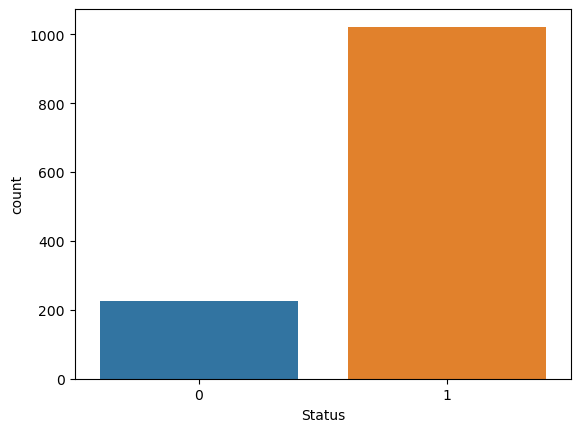

In [37]:
sns.countplot(data=data, x="Status")

Creating Independent and Dependent features

In [38]:
X = data.drop(["Status"], axis=1) # Independent Features
y = data["Status"] # Dependent Features

In [39]:
X["CUS_Gender"]

0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       1.000000
6       0.000000
7       1.000000
8       1.000000
9       0.000000
10      1.000000
11      1.000000
12      1.000000
13      0.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      0.000000
19      1.000000
20      1.000000
21      1.000000
22      0.000000
23      1.000000
24      0.000000
25      0.000000
26      0.000000
27      1.000000
28      1.000000
29      1.000000
30      1.000000
31      1.000000
32      1.000000
33      1.000000
34      0.000000
35      0.000000
36      0.000000
37      1.000000
38      0.000000
39      1.000000
40      1.000000
41      1.000000
42      1.000000
43      0.000000
44      1.000000
45      0.000000
46      1.000000
47      1.000000
48      1.000000
49      1.000000
50      1.000000
51      0.000000
52      1.000000
53      1.000000
54      0.000000
55      0.000000
56      1.000000
57      0.000000
58      1.0000

In [40]:
X.columns.get_indexer

<bound method Index.get_indexer of Index(['MARRIED', 'PARTNER', 'SINGLE', 'WIDOWED', 'AGE', 'CUS_Month_Income',
       'CUS_Gender', 'YEARS_WITH_US', 'total debit amount',
       'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'CUS_DOB_Year'],
      dtype='object')>

In [41]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      0
30      1
31      0
32      1
33      1
34      1
35      0
36      1
37      1
38      1
39      1
40      1
41      0
42      1
43      1
44      1
45      0
46      1
47      0
48      1
49      1
50      1
51      0
52      1
53      1
54      1
55      0
56      0
57      1
58      1
59      0
60      1
61      1
62      1
63      1
64      0
65      0
66      0
67      1
68      0
69      1
70      1
71      1
72      0
73      0
74      0
75      1
76      1
77      1
78      1
79      1
80      1
81      0
82      1
83      1
84      1
85      1
86      1
87      1
88      0
89      1
90      1
91      1
92      1
93      0
94      1
95      1
96      1
97      1
98      0
99      1


In [42]:
X.dtypes

MARRIED                         bool
PARTNER                         bool
SINGLE                          bool
WIDOWED                         bool
AGE                            int64
CUS_Month_Income             float64
CUS_Gender                   float64
YEARS_WITH_US                  int64
total debit amount           float64
total debit transactions       int64
total credit amount          float64
total credit transactions      int64
total transactions             int64
CUS_Target                     int64
TAR_Desc                       int64
CUS_DOB_Year                   int32
dtype: object

In [43]:
y.dtypes

dtype('int64')

Conversation of imbalance dataset to balanced dataset by using upsampling.
Not using downsampling as it has its own disadvantages of information loss

In [44]:
import imblearn
from imblearn.over_sampling import SMOTE

In [45]:
y.value_counts()

Status
1    1022
0     226
Name: count, dtype: int64

In [46]:
# Implementing Oversampling for Handling Imbalanced 
smote = SMOTE(sampling_strategy='minority') # code basics 
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Status
1    1022
0    1022
Name: count, dtype: int64

In [47]:
X_sm["CUS_Gender"]

0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       1.000000
6       0.000000
7       1.000000
8       1.000000
9       0.000000
10      1.000000
11      1.000000
12      1.000000
13      0.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      0.000000
19      1.000000
20      1.000000
21      1.000000
22      0.000000
23      1.000000
24      0.000000
25      0.000000
26      0.000000
27      1.000000
28      1.000000
29      1.000000
30      1.000000
31      1.000000
32      1.000000
33      1.000000
34      0.000000
35      0.000000
36      0.000000
37      1.000000
38      0.000000
39      1.000000
40      1.000000
41      1.000000
42      1.000000
43      0.000000
44      1.000000
45      0.000000
46      1.000000
47      1.000000
48      1.000000
49      1.000000
50      1.000000
51      0.000000
52      1.000000
53      1.000000
54      0.000000
55      0.000000
56      1.000000
57      0.000000
58      1.0000

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [50]:
y.shape

(1248,)

In [51]:
y.value_counts()

Status
1    1022
0     226
Name: count, dtype: int64

In [52]:
y_sm.value_counts()

Status
1    1022
0    1022
Name: count, dtype: int64

In [53]:
print(y_train.value_counts(), y_train.shape)

Status
1    818
0    817
Name: count, dtype: int64 (1635,)


In [54]:
print(y_test.value_counts(), y_test.shape)

Status
0    205
1    204
Name: count, dtype: int64 (409,)


In [55]:
X_train.shape

(1635, 16)

In [56]:
X_train.head(3)

,MARRIED,PARTNER,SINGLE,WIDOWED,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,CUS_DOB_Year
1938,False,False,True,False,41,1423.989667,0.847979,14,115236.536386,61,126143.488542,18,80,2223,1,1977
914,False,False,True,False,56,2500.000000,1.000000,14,2439.520000,5,35.630000,1,6,2223,1,1963
1428,True,False,True,False,64,7181.820803,0.677931,14,15083.328998,8,9578.631555,2,10,2222,1,1954


In [57]:
ss = StandardScaler()  # standard normalisation
X_train.iloc[ :, [4,5,7,8,9,10,11,12,13,14,15]] = ss.fit_transform(X_train.iloc[ :, [4,5,7,8,9,10,11,12,13,14,15]])
X_test.iloc[ :, [4,5,7,8,9,10,11,12,13,14,15]] = ss.transform(X_test.iloc[ :, [4,5,7,8,9,10,11,12,13,14,15]])

In [58]:
X_train["MARRIED"] = X_train["MARRIED"].astype('float64')
X_train["PARTNER"] = X_train["PARTNER"].astype('float64')
X_train["SINGLE"] = X_train["SINGLE"].astype('float64')
X_train["WIDOWED"] = X_train["WIDOWED"].astype('float64')

In [59]:
X_train.dtypes

MARRIED                      float64
PARTNER                      float64
SINGLE                       float64
WIDOWED                      float64
AGE                          float64
CUS_Month_Income             float64
CUS_Gender                   float64
YEARS_WITH_US                float64
total debit amount           float64
total debit transactions     float64
total credit amount          float64
total credit transactions    float64
total transactions           float64
CUS_Target                   float64
TAR_Desc                     float64
CUS_DOB_Year                 float64
dtype: object

In [60]:
X_test["MARRIED"] = X_test["MARRIED"].astype('float64')
X_test["PARTNER"] = X_test["PARTNER"].astype('float64')
X_test["SINGLE"] = X_test["SINGLE"].astype('float64')
X_test["WIDOWED"] = X_test["WIDOWED"].astype('float64')

In [61]:
X_test.dtypes

MARRIED                      float64
PARTNER                      float64
SINGLE                       float64
WIDOWED                      float64
AGE                          float64
CUS_Month_Income             float64
CUS_Gender                   float64
YEARS_WITH_US                float64
total debit amount           float64
total debit transactions     float64
total credit amount          float64
total credit transactions    float64
total transactions           float64
CUS_Target                   float64
TAR_Desc                     float64
CUS_DOB_Year                 float64
dtype: object

Implementing Logistic Regression Classification

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
classifier = LogisticRegression()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter = {'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5,6,7,8,9,10,11,12],
             'max_iter':[100,200,120]
            }

In [66]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter, scoring='accuracy', cv=5)

In [67]:
classifier_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_iter': [100, 200, 120],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [69]:
print(classifier_regressor.best_params_)

{'C': 12, 'max_iter': 100, 'penalty': 'l2'}


In [70]:
print(classifier_regressor.best_score_)

0.8819571865443425


In [71]:
y_pred = classifier_regressor.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

In [73]:
#Used accuracy metric because dataset in balanced..
score=accuracy_score(y_pred,y_test)

print(score)

0.8777506112469438


In [74]:
cm = confusion_matrix(y_test, y_pred)

In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       193
           1       0.91      0.86      0.88       216

    accuracy                           0.88       409
   macro avg       0.88      0.88      0.88       409
weighted avg       0.88      0.88      0.88       409



Implementing Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
treemodel = DecisionTreeClassifier()

In [78]:
parameter = {'criterion':['gini','entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'max_depth':[10,30,50,70,90,110],
            'max_features':['auto', 'sqrt', 'log2']}

In [79]:
classifier_decision = GridSearchCV(treemodel,param_grid=parameter, scoring='accuracy', cv=5)

In [80]:
classifier_decision.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50, 70, 90, 110],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [81]:
print(classifier_decision.best_params_)

{'criterion': 'log_loss', 'max_depth': 70, 'max_features': 'sqrt', 'splitter': 'random'}


In [82]:
print(classifier_decision.best_score_)

0.8489296636085626


In [83]:
y_decison_prediction = classifier_decision.predict(X_test)

In [84]:
score_decision=accuracy_score(y_decison_prediction,y_test)
print(score_decision)

0.843520782396088


In [85]:
print(classification_report(y_decison_prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       211
           1       0.83      0.85      0.84       198

    accuracy                           0.84       409
   macro avg       0.84      0.84      0.84       409
weighted avg       0.84      0.84      0.84       409



Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
print(rf.score(X_train, y_train)) 
print(rf.score(X_test, y_test))

1.0
0.8973105134474327


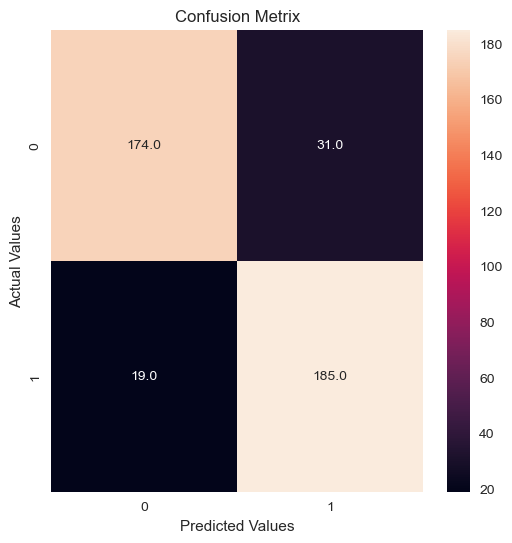

In [90]:
# plotting confusion metrix for logistic regression
plt.style.use("seaborn")
plt.figure(figsize=(6,6))#, #dpi=90)
sns.heatmap(cm, annot=True, fmt=".1f")
plt.title("Confusion Metrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()